# 03 - Keras API NN's (Advanced deep-leraning best practices)

**Contenido:**

* Modelos como grafos

* Callbacks (batch normalization. residual conection, hyperparameter optimization, and model ensambling)

* TensorBoard (visualización y monitoreo del entrenamiento)



**Motivación:** 

* Modelo secuencial asume que la red tiene exactamente una entrada y una salida, un *stack* lineal

* Redes puedn tener multiples entrada, salidas o ramas entre capas (grafos)

**Ejemplo:** Suponga que tiene la tarea de predecir le precio más problable de una pieca de ropa de segunda mano, utilizando los siguientes inpus: metadatos (marca, edad, y así), utilizar descripción (texto), e imagenes del producto.

* Si se tiene los metadatos utiliza una capa densa conectada a una red y predices el precio.

* Si se tiene solo el texto utilizas una red recurrento o un !D convnet.
 
* Si se tiene solo la imagen utilizas 2D convnet

**¿Cómo utilizar los tres?** i) entrenar por separado y y hacer un promedio ponderado de los predictores. La iformación puede ser redundante; ii) aprender un modelo donde aprenda de los tres tipos de datos, por medio de tres entradas

Algunos modelos nececitan predecir multiples etiquetas

**Ejemplo:** Dada una novela te gustaría predecir el genero de la novela y la fecha en la que fue escrita.

## Introducción functional API

* Manipulas tensores

* Layers como funciones toman tensores y regresan tensores (por eso, functional API)



In [ ]:
from keras import Input, layers

input_tensor = Input(shape=(32,))            # un tensor

dense = layers.Dense(32, activation='relu')  # layer es una función

output_tensor = dense(input_tensor)          # una layer puede llamar un tensor
                                             # regresando otro tensor

### Modelo Sequential vs functional API

In [32]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from keras import Input

# Modelo Sequential

modelo_seq = Sequential()
modelo_seq.add(Dense(32, activation = "relu", input_shape = (64,)))
modelo_seq.add(Dense(32, activation = "relu"))
modelo_seq.add(Dense(10, activation = "softmax"))


### Agregando capas con API



* No se hace uso de **add**

* Cada nueva capa usa como entrada la salida de la anteriormente (tamaño se define por el número de unidades).

* Indicar el flujo del tensor:



tensor_salida = layers.Dense(units=num_unidades, 
                                activation = 'funcion_activacion', 
                                input_shape=(*shape*)) (tensor_entrada)

x=layers.Dense(units=32, activation='relu') (input_tensor)
x=layers.Dense(units=32, activation='relu') (x)
output_tensor=layers.Dense(10, activation='softmax') (x)

de forma más explicita

in_tensor=Input(shape=(64,))

x1 = layers.Dense(units = 32, activation = 'relu') (in_tensor)
x2 = layers.Dense(units = 32, activation = 'relu') (x1)
out_tensor=layers.Dense(units=10, activation='softmax') (x2)

* Definir modelo de entrada y salida

model = Model(in_tensor, out_tensor)

Modelo multiple:

model = Model(inputs=[main_input, auxiliary_input], 
               outputs=[main_output, auxiliary_output])

inputs: es el tensor (o lista de tensores) datos

outputs: es el tensor (o lista de tensore) resultados

In [26]:
# Modelo functionla API

entrada = Input(shape = (64,))
x = Dense(32, activation = "relu")(entrada)
x = Dense(32, activation = "relu")(x)
salida = Dense(10, activation = "softmax")(x)

modelo = Model(entrada, salida)

modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


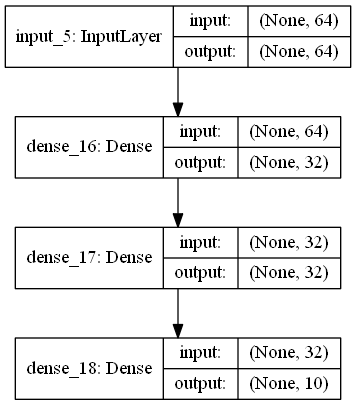

In [27]:
from keras.utils import plot_model

plot_model(modelo, to_file='Taller03_1.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='Taller03_1.png')

### Capas (layers) de operación con multiples entradas y salidas

In [ ]:
from keras import layers

# suma de tensores
x =  keras.layers.Add()([x1,x2])

# resta de tensores
x = keras.layer.Substract()([x1,x2])

# concatena tensores
x = keras.layer.Concatenate(axis = -1)([x1,x2])

# multiplica tensores
x = keras.layer.Multiply()([x1,x2])

# promedio de  tensores
x = keras.layer.Averange()([x1,x2, x3])

# máximo tensores
x = keras.layer.Maximum()([x1,x2])

# mínimo tensores
x = keras.layer.Minimum()([x1,x2])

# prosucto punto tensores
x = keras.layer.Dot()([x1,x2])

### Capas (layers) repetitivas

In [35]:
# Modelo functionla API

entrada = Input(shape = (64,))
x = Dense(32, activation = "relu")(entrada)
for i in range(5):
    x = Dense(32, activation = "relu")(x)
    x = Dropout(.5)(x)
    x = Dense(16, activation = "relu")(x)
    x = Dropout(.5)(x)
    
salida = Dense(10, activation = "softmax")(x)

modelo = Model(entrada, salida)

modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 64)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_57 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 32)                544       
__________

### Ejemplo 1: NN's Keras API

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [3]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
from keras import Input
from keras.layers import Dense
from keras import Model

input_shape = Input(shape = (28*28,))
x = Dense(512, activation = "relu")(input_shape)
output_tensor = Dense(10, activation ="softmax")(x)

model = Model(input_shape, output_tensor)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


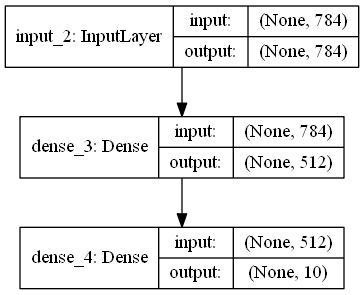

In [6]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='TALLER03.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='TALLER03.png')

In [8]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

W0825 13:42:38.398592 13048 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0825 13:42:39.713682 13048 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
import time
tic=time.time()

history = model.fit(train_images, train_labels, epochs=5, 
                 validation_split=0.2, batch_size=128)

print('Tiempo de procesamiento (secs): ', time.time()-tic)

W0825 13:42:42.132684 13048 deprecation.py:323] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0825 13:42:42.176463 13048 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 128us/step - loss: 0.2886 - acc: 0.9163 - val_loss: 0.1520 - val_acc: 0.9553
Epoch 2/5
48000/48000 [==============================] - 1s 27us/step - loss: 0.1181 - acc: 0.9649 - val_loss: 0.1030 - val_acc: 0.9702
Epoch 3/5
48000/48000 [==============================] - 1s 28us/step - loss: 0.0769 - acc: 0.9768 - val_loss: 0.0907 - val_acc: 0.9731
Epoch 4/5
48000/48000 [==============================] - 1s 27us/step - loss: 0.0556 - acc: 0.9835 - val_loss: 0.0867 - val_acc: 0.9757
Epoch 5/5
48000/48000 [==============================] - 1s 27us/step - loss: 0.0422 - acc: 0.9875 - val_loss: 0.0781 - val_acc: 0.9768
Tiempo de procesamiento (secs):  11.558604001998901


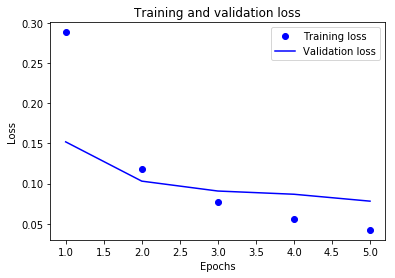

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

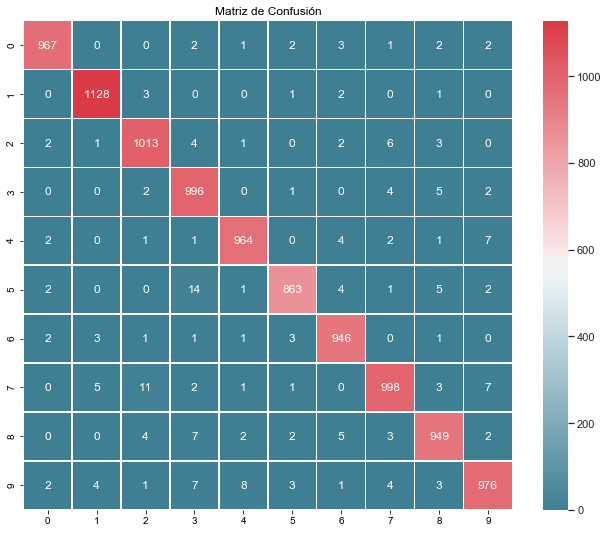

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import numpy as np

classes = model.predict(test_images)

test_true_labels      = np.argmax(test_labels, axis=1)
test_predicted_labels = np.argmax(classes,axis=1)


C = confusion_matrix(test_true_labels, test_predicted_labels)


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')


plt.show()


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Acc:", test_acc)

10000/10000 [==============================] - 1s 56us/step
Acc: 0.98


### Ejemplo 2: Multiples entradas

In [58]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

# Dos entradas
input1 = Input(shape=(28*28,))
input2 = Input(shape=(28*28,))

# Layer que une canales
x = keras.layers.concatenate([input1, input2])

# Capa densa (fully connected)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

modelo_multInput = Model(inputs=[input1, input2], 
              outputs=predictions)

modelo_multInput.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


modelo_multInput.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
input_28 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 1568)         0           input_27[0][0]                   
                                                                 input_28[0][0]                   
__________________________________________________________________________________________________
dense_89 (Dense)                (None, 64)           100416      concatenate_3[0][0]              
__________

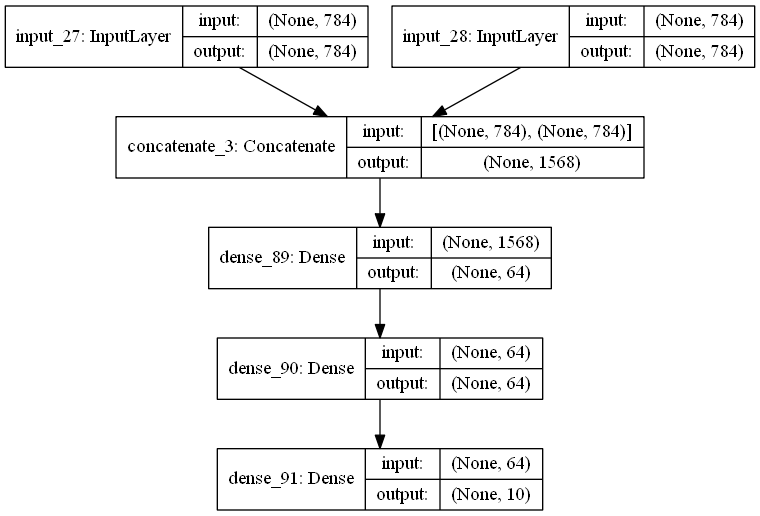

In [59]:
plot_model(modelo_multInput, to_file='Taller03_2.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='Taller03_2.png')


In [60]:
import time
tic=time.time()

history = modelo_multInput.fit([train_images,train_images], train_labels, epochs=5, 
                 validation_split=0.2, batch_size=128)

print('Tiempo de procesamiento (secs): ', time.time()-tic)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 41us/step - loss: 0.3576 - acc: 0.8978 - val_loss: 0.1849 - val_acc: 0.9464
Epoch 2/5
48000/48000 [==============================] - 1s 28us/step - loss: 0.1724 - acc: 0.9499 - val_loss: 0.1935 - val_acc: 0.9393
Epoch 3/5
48000/48000 [==============================] - 1s 28us/step - loss: 0.1288 - acc: 0.9619 - val_loss: 0.1418 - val_acc: 0.9594
Epoch 4/5
48000/48000 [==============================] - 1s 29us/step - loss: 0.1019 - acc: 0.9696 - val_loss: 0.1201 - val_acc: 0.9642
Epoch 5/5
48000/48000 [==============================] - 1s 29us/step - loss: 0.0836 - acc: 0.9745 - val_loss: 0.1128 - val_acc: 0.9683
Tiempo de procesamiento (secs):  7.624640226364136


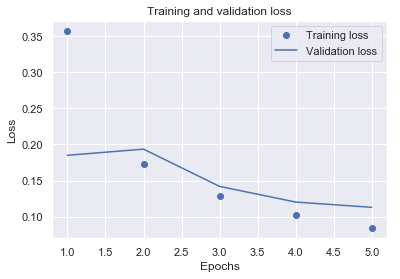

In [61]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

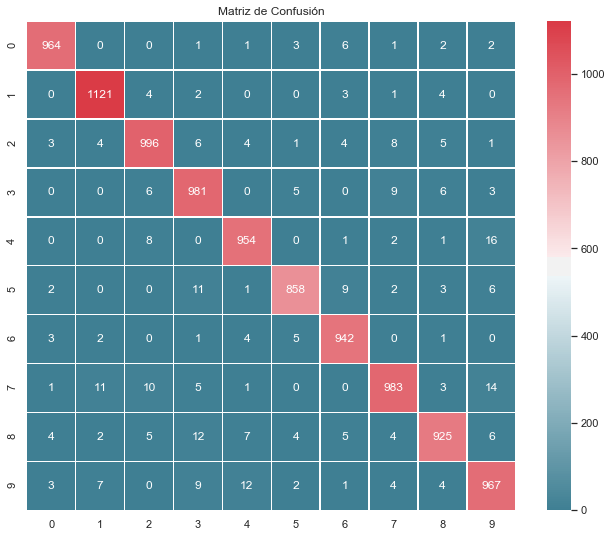

10000/10000 [==============================] - 0s 34us/step
Acc: 0.9691


In [62]:
classes = modelo_multInput.predict([test_images,test_images])

test_true_labels      = np.argmax(test_labels, axis=1)
test_predicted_labels = np.argmax(classes,axis=1)


C = confusion_matrix(test_true_labels, test_predicted_labels)


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')


plt.show()

test_loss, test_acc = modelo_multInput.evaluate([test_images,test_images], test_labels)
print("Acc:", test_acc)

### Ejemplo 3: Multiples salidas

In [99]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

# Dos entradas
input1 = Input(shape=(28*28,))

# Layer densa en común
x = Dense(64, activation='relu')(input1)

# dos caminos de procesamiento
x2 = Dense(64, activation='relu')(x)                # Densa oculta
predictions1 = Dense(10, activation='softmax', name = "salida1")(x2)  # Densa salida

x3 = Dense(64, activation='relu')(x)                # Densa oculta
predictions2 = Dense(10, activation='softmax', name = "salida2")(x3)  # Densa salida

# Modelo con dos salidas y una entrada
modelo_multOutput = Model(inputs=[input1], 
                          outputs=[predictions1, predictions2], 
                          name='multOutput')

modelo_multOutput.compile(optimizer='rmsprop',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

modelo_multOutput.summary()



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_33 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_107 (Dense)               (None, 64)           50240       input_33[0][0]                   
__________________________________________________________________________________________________
dense_108 (Dense)               (None, 64)           4160        dense_107[0][0]                  
__________________________________________________________________________________________________
dense_109 (Dense)               (None, 64)           4160        dense_107[0][0]                  
__________________________________________________________________________________________________
salida1 (D

* Nota: no simpre se tiene variables categoricas de salida, necesita función de costo adecuada en cada caso

En caso de que quieras predecir metadatos, y categorias:


model.compile(optimizer='rmsprop',
loss=['mse', 'categorical_crossentropy''])

En caso de que nombraras las capas:

model.compile(optimizer='rmsprop',
              loss={'salida1': 'mse',
                    'salida2': 'categorical_crossentropy'})
                    
Se puede pesar conforme relevancia de etiqueta

model.compile(optimizer='rmsprop',
            loss=['mse', 'categorical_crossentropy'],
            loss_weights=[0.25, 10.])
            
model.compile(optimizer='rmsprop',
            loss={'salida1': 'mse',
            'salida2': 'categorical_crossentropy'},
             loss_weights={'salida1': 0.25,
             'salida2': 1.})        

Nota: the resulting loss values are summed into a global loss

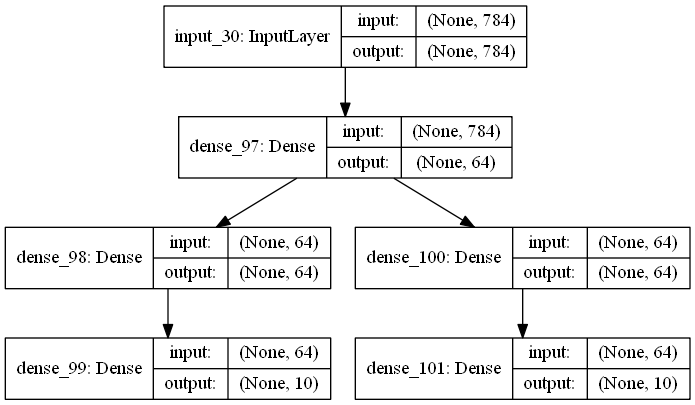

In [65]:
plot_model(modelo_multOutput, to_file='Taller03_3.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='Taller03_3.png')


In [68]:
import time
tic=time.time()

history = modelo_multOutput.fit(train_images, [train_labels, train_labels],
                               epochs=5,  validation_split=0.2, batch_size=128)

print('Tiempo de procesamiento (secs): ', time.time()-tic)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 59us/step - loss: 0.8657 - dense_99_loss: 0.4394 - dense_101_loss: 0.4262 - dense_99_acc: 0.8735 - dense_101_acc: 0.8804 - val_loss: 0.4412 - val_dense_99_loss: 0.2240 - val_dense_101_loss: 0.2173 - val_dense_99_acc: 0.9323 - val_dense_101_acc: 0.9336
Epoch 2/5
48000/48000 [==============================] - 2s 42us/step - loss: 0.4088 - dense_99_loss: 0.2062 - dense_101_loss: 0.2026 - dense_99_acc: 0.9391 - dense_101_acc: 0.9402 - val_loss: 0.3296 - val_dense_99_loss: 0.1664 - val_dense_101_loss: 0.1632 - val_dense_99_acc: 0.9516 - val_dense_101_acc: 0.9528
Epoch 3/5
48000/48000 [==============================] - 2s 39us/step - loss: 0.3022 - dense_99_loss: 0.1523 - dense_101_loss: 0.1499 - dense_99_acc: 0.9548 - dense_101_acc: 0.9553 - val_loss: 0.2805 - val_dense_99_loss: 0.1397 - val_dense_101_loss: 0.1407 - val_dense_99_acc: 0.9584 - val_dense_101_acc: 0.9593
Epoch 4/5
4800

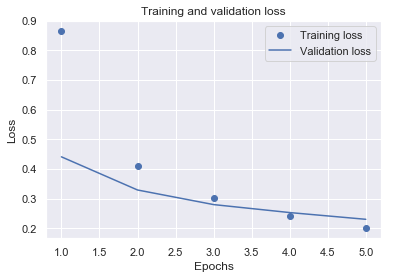

In [70]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

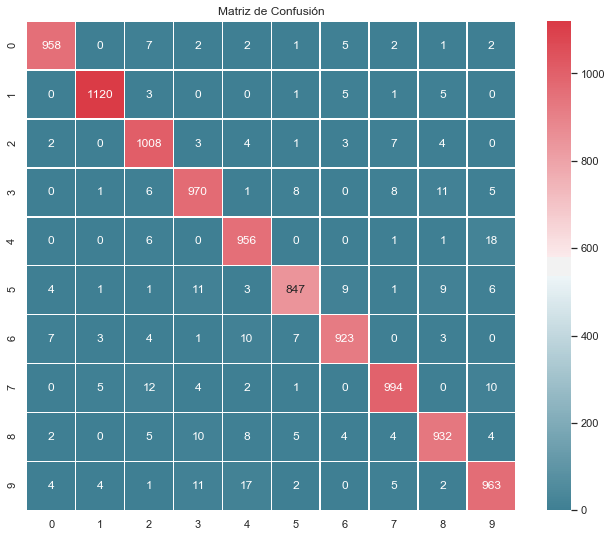

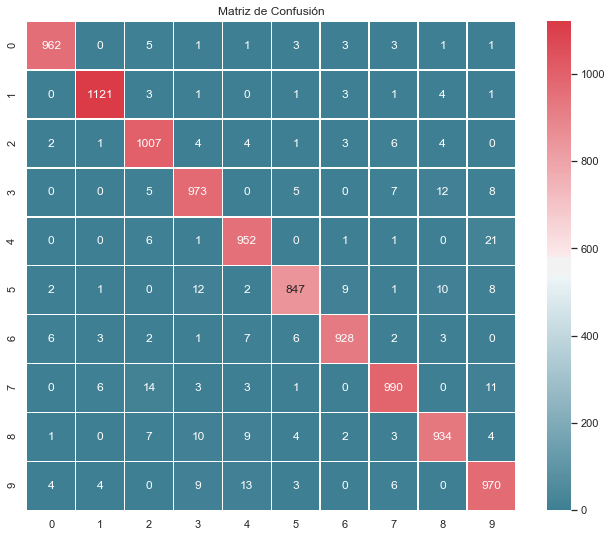

In [88]:
classes = modelo_multOutput.predict(test_images)

test_true_labels      = np.argmax(test_labels, axis=1)
test_predicted_labels_1 = np.argmax(classes[0],axis=1)
test_predicted_labels_2 = np.argmax(classes[1],axis=1)

C1 = confusion_matrix(test_true_labels, test_predicted_labels_1)
C2 = confusion_matrix(test_true_labels, test_predicted_labels_2)

f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C1, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')


plt.show()


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C2, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')


plt.show()



In [94]:
test_loss, test_loss_1,  test_loss_2, test_acc_1, test_acc_2 = modelo_multOutput.evaluate(test_images, [test_labels,test_labels])


10000/10000 [==============================] - 0s 46us/step


In [95]:
print("Acc_1:", test_acc_1)
print("Acc_2:", test_acc_2)

Acc_1: 0.9671
Acc_2: 0.9684


### Ejemplo 4: Multiples ramas

In [101]:
img_dim     = (32, 32, 1,)
img_size    = img_dim[0]*img_dim[1]
num_filters = [64,32,16]
kernel_size = 3

In [102]:
import keras
from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, LeakyReLU
from keras.models import Model
from keras import backend as K


In [103]:
# Dos entradas
input1 = Input(shape=img_dim)

# Rama Convolucional de procesamiento

'''
x1 = inputs
for numf in num_filters:
    x1 = Conv2D(filters  = numf, 
               kernel_size = kernel_size, 
               strides     =  2,
               padding     = 'same',
               activation='relu')(x1)
    
shape_before_flattening_x = K.int_shape(x1)
x1=Flatten()(x1)
x1out = Dense(units=16, activation='relu')(x1)

'''
# Rama 2 Densa de procesamiento
x1    = Flatten()(input1)
x1out = Dense(units=16, activation='relu')(x1)
shape_x1out = K.int_shape(x1out)

# Rama 2 Densa de procesamiento
x2    = Flatten()(input1)
x2    = Dense(units=48, activation='relu')(x2)
x2out = Dense(units=16, activation='relu')(x2)
shape_x2out = K.int_shape(x2out)

# Rama 2 Densa de procesamiento
x3    = Flatten()(input1)
x3    = Dense(units=64, activation='relu')(x3)
x3    = Dense(units=32, activation='relu')(x3)
x3out = Dense(units=16, activation='relu')(x3)
shape_x2out = K.int_shape(x3out)

# capa de union de ramas de procesamiento
x12 = keras.layers.Concatenate()([x1out, x2out, x3out])

y = Dense(10, activation='softmax')(x12)

model_multipleBranch = Model(inputs=[input1], 
                          outputs=[y], 
                          name='multiOut')

model_multipleBranch.compile(optimizer='rmsprop',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])


model_multipleBranch.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 1024)         0           input_34[0][0]                   
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 1024)         0           input_34[0][0]                   
__________________________________________________________________________________________________
dense_113 (Dense)               (None, 64)           65600       flatten_3[0][0]                  
__________________________________________________________________________________________________
flatten_1 

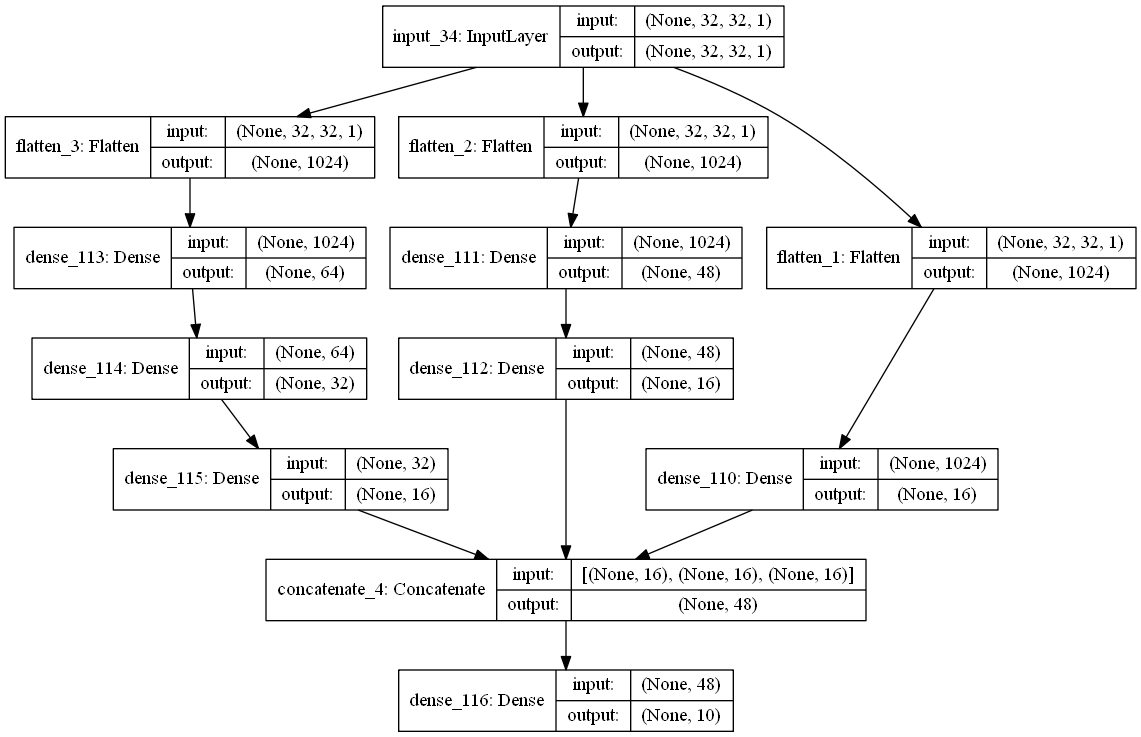

In [104]:
# Visualización 
from keras.utils import plot_model
plot_model(model_multipleBranch, to_file='Taller03_4.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='Taller03_4.png')

**Nota:** Using the abstract Keras backend to write new code

If you want the Keras modules you write to be compatible with both Theano (th) and TensorFlow (tf), you have to write them via the abstract Keras backend API. Here's an intro.

You can import the backend module via:

from keras import backend as K

ver: https://keras.io/backend/